In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as p

from IPython.core.magic import register_cell_magic
@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)



In [2]:
import pandas as pd

data = pd.read_csv('citrus.csv')

data_labels = data.iloc[:, 0].values
data_features = data.iloc[:, 1:].values


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [4]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import time

df = pd.DataFrame({
    'Component 0': data_features[:, 0],
    'Component 1': data_features[:, 1],
    'Component 2': data_features[:, 2],
    'label': data_labels
})

fig = px.scatter_3d(df, x='Component 0', y='Component 1', z='Component 2', color='label')
fig.show()

In [5]:
corp_perc = 80

corp_split = int(corp_perc * data.shape[0] // 100)

four_indices = np.random.choice(np.arange(data.shape[0] // 2), corp_split // 2, replace=False)
nine_indices = np.random.choice(np.arange(data.shape[0] // 2, data.shape[0]), corp_split // 2, replace=False)
my_data_orange = data.iloc[four_indices] 
my_data_grapefruit = data.iloc[nine_indices] 

my_data = pd.concat([my_data_orange, my_data_grapefruit])

test_perc = 100 - corp_perc
semi_split = int(test_perc * my_data.shape[0] // 100)

# Creating training and testing input dictionaries
training_input = {'A': my_data_orange.iloc[:-semi_split, 1:], 'B': my_data_grapefruit.iloc[:-semi_split, 1:]}
test_input = {'A': my_data_orange.iloc[-semi_split:, 1:], 'B': my_data_grapefruit.iloc[-semi_split:, 1:]}
testing_input = pd.concat([my_data_orange.iloc[-semi_split:, 1:], my_data_grapefruit.iloc[-semi_split:, 1:]])
testing_labels = pd.concat([my_data_orange.iloc[-semi_split:, :1], my_data_grapefruit.iloc[-semi_split:, :1]])

# Prepare the training and testing datasets
x_train = pd.concat([training_input['A'], training_input['B']]).values
y_train = np.concatenate((np.zeros(len(training_input['A'])), np.ones(len(training_input['B']))))
x_test = testing_input.values
y_test = np.concatenate((np.zeros(len(test_input['A'])), np.ones(len(test_input['B']))))

# Print the lengths of the datasets
print("Length of x_train:", len(x_train))
print("Length of y_train:", len(y_train))
print("Length of x_test:", len(x_test))
print("Length of y_test:", len(y_test))


Length of x_train: 4800
Length of y_train: 4800
Length of x_test: 3200
Length of y_test: 3200


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
from qiskit import *
from qiskit_ibm_provider import *
from qiskit_ibm_runtime import *
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from qiskit.primitives import Sampler, Estimator
"""
# IBM Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import Estimator, Sampler, Session
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
 
# get a real backend from the runtime service
#backend = service.get_backend('ibmq_manila')
 
# generate a simulator that mimics the real quantum system with the latest calibration results
#backend_sim = AerSimulator.from_backend(backend)
# Add your token below

service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.get_backend("ibm_kyoto")
#backend = FakeManilaV2()

session = Session(backend=backend)
#estimator = Estimator(session=session)
sampler = Sampler(session = session)
"""
estimator = Estimator()
sampler = Sampler()
import pandas as pd
import seaborn as sns
import time
import psutil
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit.primitives import Sampler

In [7]:
%%write_and_run feature_map.py
# The write_and_run function writes the content in this cell into the file "feature_map.py"

### WRITE YOUR CODE BETWEEN THESE LINES - START
import numpy as np
from qiskit import QuantumCircuit 
from qiskit.circuit import ParameterVector

def feature_map(num_qubits): 
    # Build the feature map
    reps = 3
    feature_map_circuit = QuantumCircuit(num_qubits)
    x = ParameterVector('x', length=num_qubits)
    for _ in range(reps):
        for i in range(num_qubits):
            feature_map_circuit.rx(x[i], i)
            feature_map_circuit.rz(x[i], i)
            feature_map_circuit.barrier()
        for control in range(num_qubits-1, 0, -1):
            target = control - 1
            feature_map_circuit.rx(x[target], target)
            feature_map_circuit.cx(control, target)
            feature_map_circuit.rx(x[target], target)
            feature_map_circuit.barrier()
        for i in range(num_qubits):
            feature_map_circuit.rx(x[i], i)
            feature_map_circuit.rz(x[i], i)
        feature_map_circuit.barrier()

    # Return both the circuit and the number of qubits
    return feature_map_circuit, num_qubits


In [8]:
num_features = data.shape[1]-1
num_features

5

In [9]:
from qiskit.circuit.library import ZFeatureMap

num_qubits = num_features

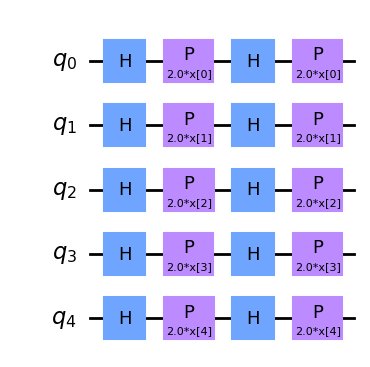

In [10]:

# Initialize the feature map
feature_map_circuit = ZFeatureMap(num_features)
feature_map_circuit.decompose().draw(output='mpl', style='clifford')


In [11]:
#write_and_run variational_circuit.py
    
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
    

def variational_circuit():
    num_qubits = num_features           
    reps = 3
    x = ParameterVector('L', length=(num_qubits*(reps+1)*(reps+1)))
    var_circuit = QuantumCircuit(num_qubits)
    count = 0
    for _ in range(reps):
        for i in range(num_qubits):
            var_circuit.ry(x[count], i)
            count+=1
        for i in range(num_qubits):
            var_circuit.rz(x[count], i)
            count+=1
        for i in range(num_qubits):
            for j in range(i+1,num_qubits):
                var_circuit.cx(i,j)
        var_circuit.x(0)
 
    for i in range(num_qubits):
        var_circuit.ry(x[count], i)
        count+=1
    for i in range(num_qubits):
        var_circuit.rz(x[count], i)
        count+=1
    
    return var_circuit

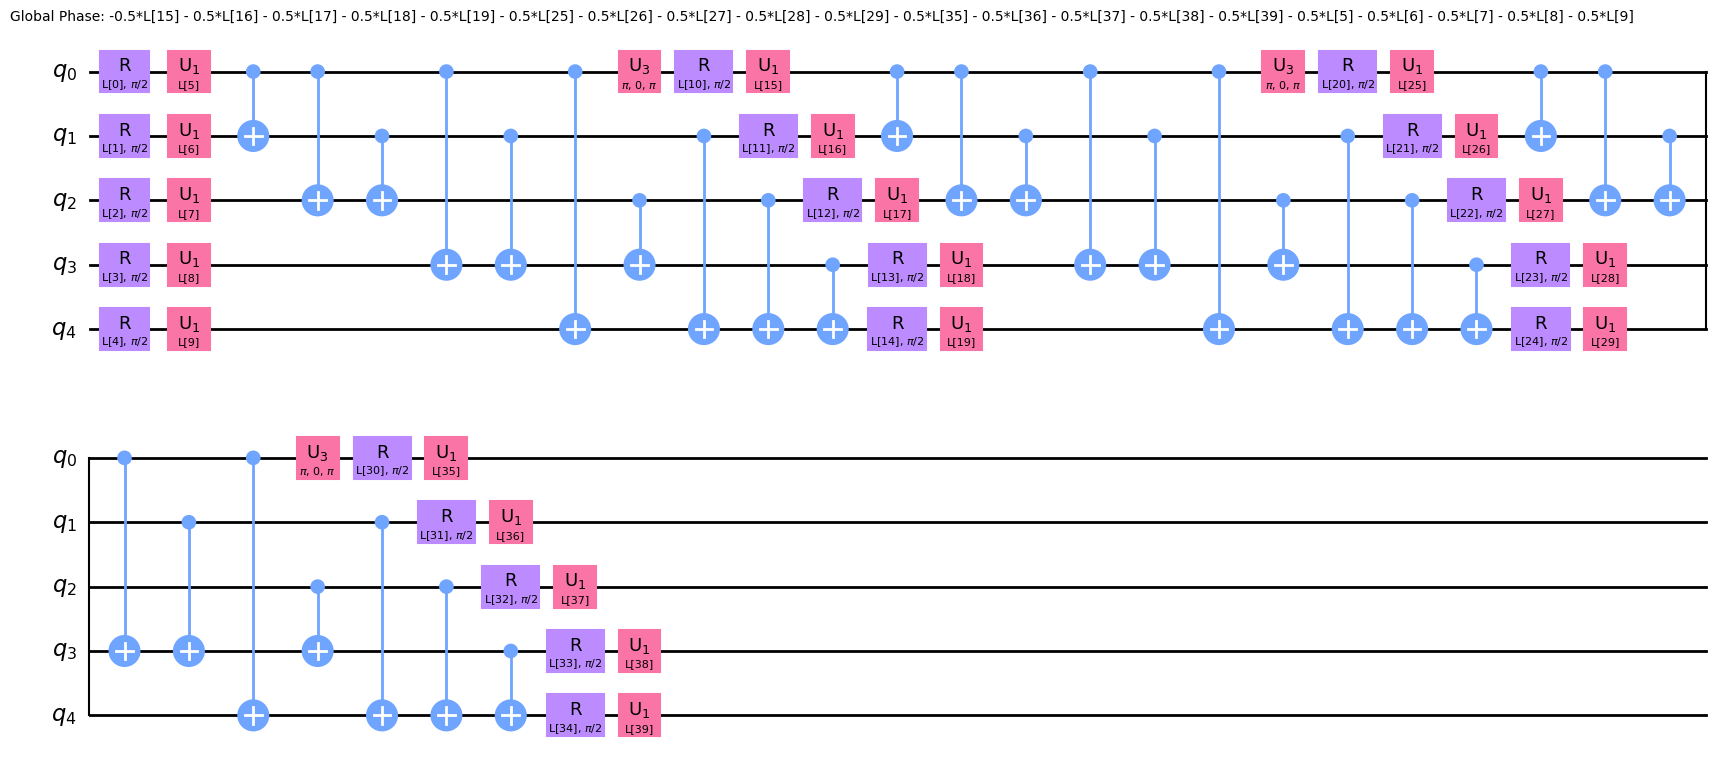

In [12]:
# Initialize the variational circuit
variational_circuit_circuit = variational_circuit()
variational_circuit_circuit.decompose().draw(output='mpl', style='clifford')

In [13]:
feature_map_circuit.depth(), variational_circuit_circuit.depth(), 


(1, 25)

In [14]:
"""
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp, random_hermitian
from qiskit_ibm_runtime import QiskitRuntimeService, Session, EstimatorV2 as Estimator
 
n_qubits = 127
 
rng = np.random.default_rng(1234)
mat = np.real(random_hermitian(n_qubits, seed=rng))
circuit = IQP(mat)
mat = np.real(random_hermitian(n_qubits, seed=rng))
another_circuit = IQP(mat)
observable = SparsePauliOp("X" * n_qubits)
another_observable = SparsePauliOp("Y" * n_qubits)
 
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circuit)
another_isa_circuit = pm.run(another_circuit)
isa_observable = observable.apply_layout(isa_circuit.layout)
another_isa_observable = another_observable.apply_layout(another_isa_circuit.layout)
 
service = QiskitRuntimeService()
 
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
 
with Session(service=service, backend=backend) as session:
    estimator = Estimator(session=session)
 
    estimator.options.optimization_level = 1
    estimator.options.resilience_level = 1
 
    job = estimator.run(transpiled_feature_map)
    another_job = estimator.run(transpiled_var_circ)
    result = job.result()
    another_result = another_job.result()

"""

'\nimport numpy as np\nfrom qiskit.circuit.library import IQP\nfrom qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager\nfrom qiskit.quantum_info import SparsePauliOp, random_hermitian\nfrom qiskit_ibm_runtime import QiskitRuntimeService, Session, EstimatorV2 as Estimator\n \nn_qubits = 127\n \nrng = np.random.default_rng(1234)\nmat = np.real(random_hermitian(n_qubits, seed=rng))\ncircuit = IQP(mat)\nmat = np.real(random_hermitian(n_qubits, seed=rng))\nanother_circuit = IQP(mat)\nobservable = SparsePauliOp("X" * n_qubits)\nanother_observable = SparsePauliOp("Y" * n_qubits)\n \npm = generate_preset_pass_manager(optimization_level=1, backend=backend)\nisa_circuit = pm.run(circuit)\nanother_isa_circuit = pm.run(another_circuit)\nisa_observable = observable.apply_layout(isa_circuit.layout)\nanother_isa_observable = another_observable.apply_layout(another_isa_circuit.layout)\n \nservice = QiskitRuntimeService()\n \nbackend = service.least_busy(operational=True, simulat

In [15]:
cls_opt = COBYLA(maxiter=400, tol=0.001)

In [16]:
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit
# construct QNN with the QNNCircuit's default ZZFeatureMap feature map and RealAmplitudes ansatz.
qc = QNNCircuit(num_qubits=num_qubits, feature_map = feature_map_circuit, ansatz= variational_circuit_circuit)
qc.decompose().draw("mpl", style="clifford")
estimator_qnn = EstimatorQNN(circuit=qc, estimator=estimator)

In [17]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals))
    , objective_func_vals)
    plt.show()

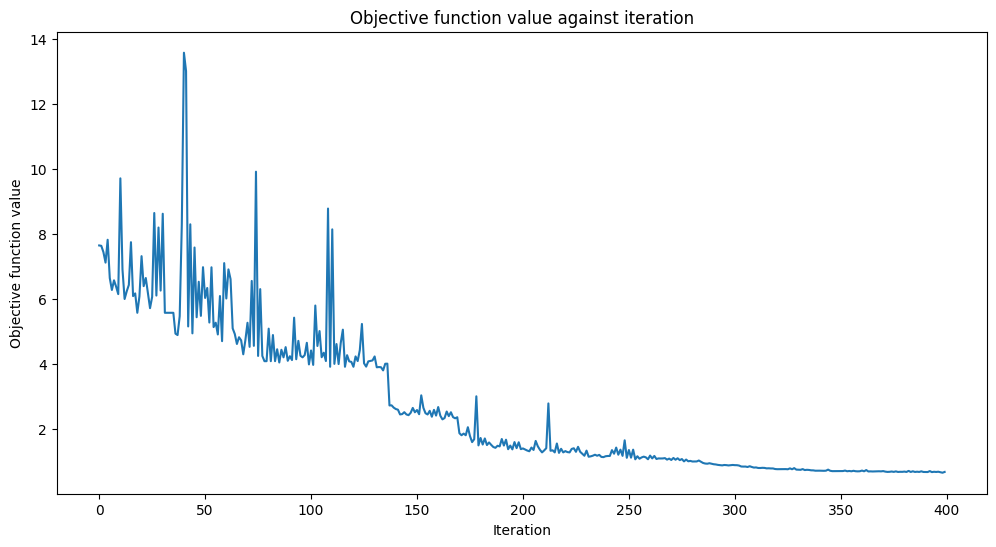

Training time: 4097 seconds


In [18]:
# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, 
    optimizer=cls_opt, 
    callback=callback_graph, 
    loss='cross_entropy',
)

# clear objective value history
objective_func_vals = []

start = time.time()
estimator_classifier.fit(x_train, y_train)
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

In [19]:
train_score_q2_ra = estimator_classifier.score(x_train, y_train)
test_score_q2_ra = estimator_classifier.score(x_test, y_test)

print(f"EstimatorQNN on the training dataset using TwoLocal: {train_score_q2_ra:.2f}")
print(f"EstimatorQNN on the test dataset using TwoLocal:     {test_score_q2_ra:.2f}")

EstimatorQNN on the training dataset using TwoLocal: 0.50
EstimatorQNN on the test dataset using TwoLocal:     0.50


In [20]:
estimator_classifier.weights

array([ 1.93765146,  1.52152572,  1.61639974, -0.13348428,  1.83893871,
        1.33248905,  0.12524969,  1.29242665,  1.35576151,  0.11932923,
        0.70632776,  1.32669453,  0.3483096 ,  1.26050998, -0.01617328,
        0.45092924,  1.26616863,  1.41281453,  0.43552279,  1.09122828,
        0.33965957,  0.40058641, -0.60494037,  0.15721939,  0.66110193,
        0.39184614, -0.03665024,  0.4854668 ,  0.05300333,  0.18761251,
        0.58438205,  2.20628658,  0.60008991,  0.38996607,  1.18952251,
        1.82422063,  1.78794221,  0.34837454,  0.42221759,  0.43367984])

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

result = estimator_classifier.predict(x_test)

# Calculate accuracy and F1 score
estimator_qnn_score = accuracy_score(y_test, result) * 100
f1 = f1_score(y_test, result, average='weighted') * 100
print('Accuracy =', estimator_qnn_score)
print('F1 Score =', f1)


Accuracy = 50.0
F1 Score = 33.33333333333333


In [22]:
feature_map_circuit.depth()


1

In [23]:
feature_map_circuit.size()


1

In [24]:
qc.depth()

26

In [25]:
circuit_size = qc.size()

In [26]:
def meyer_wallach(circuit, num_qubits, size, sample=1024):
    """
        Returns the meyer-wallach entanglement measure for the given circuit. 
    """

    res = np.zeros(sample, dtype=complex)
    N = num_qubits

    for i in range(sample):
        params = np.random.uniform(-np.pi, np.pi, size)
        ansatz = circuit(params, N)
        result = execute(ansatz, 
                       backend=Aer.get_backend('statevector_simulator')).result()
        U = result.get_statevector(ansatz, decimals=5)
        entropy = 0
        qb = list(range(N))

        for j in range(N):
            dens = quantum_info.partial_trace(U, qb[:j]+qb[j+1:]).data
            trace = np.trace(dens**2)
            entropy += trace

        entropy /= N
        res[i] = 1 - entropy
    
    return 2*np.sum(res).real/sample

In [27]:
meyer_wallach( num_qubits, circuit_size)

TypeError: meyer_wallach() missing 1 required positional argument: 'size'